In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
#%matplotlib 

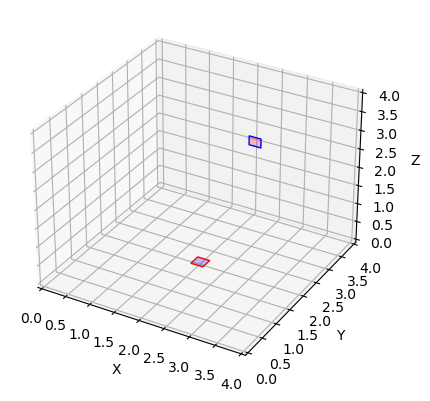

In [2]:

# Side length of the squares
side_length = 0.246

# Distance between the centers of the squares
#center_distance = 2.828

# Coordinates of the centers of the squares
center1 = np.array([2, 2, 0])
center2 = np.array([2,4,2])

# Create the vertices of the first square in the XY plane
square1_vertices = [
    [center1[0] - side_length / 2, center1[1] - side_length / 2, center1[2]],
    [center1[0] + side_length / 2, center1[1] - side_length / 2, center1[2]],
    [center1[0] + side_length / 2, center1[1] + side_length / 2, center1[2]],
    [center1[0] - side_length / 2, center1[1] + side_length / 2, center1[2]],
]

# Create the vertices of the second square in the XZ plane
square2_vertices = [
    [ center2[0] - side_length / 2, center2[1], center2[2] - side_length / 2],
    [ center2[0] + side_length / 2, center2[1], center2[2] - side_length / 2],
    [ center2[0] + side_length / 2, center2[1],  center2[2] + side_length / 2],
    [ center2[0] - side_length / 2, center2[1], center2[2] + side_length / 2],
]

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the squares to the plot
ax.add_collection3d(Poly3DCollection([square1_vertices], facecolors='blue', linewidths=1, edgecolors='r', alpha=.25))
ax.add_collection3d(Poly3DCollection([square2_vertices], facecolors='red', linewidths=1, edgecolors='b', alpha=.25))

# Set the limits of the plot
padding = 0.5
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlim(0, 4)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()

In [3]:
import numpy as np

def calculate_angle(vector1, vector2):
    # Calculate the dot product of the vectors
    dot_product = np.dot(vector1, vector2)
    
    # Calculate the magnitudes of the vectors
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure the cosine value is within the valid range to avoid numerical errors
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # Calculate the angle in radians
    angle_rad = np.arccos(cos_theta)
    
    # Convert the angle to degrees
    angle_deg = np.degrees(angle_rad)
    
    return angle_deg

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

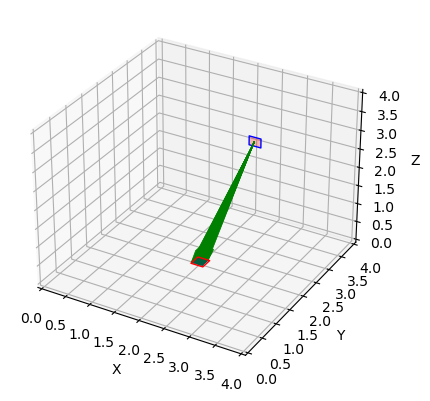

In [25]:


# Side length of the squares
side_length = 0.246

# Distance between the centers of the squares
#center_distance = 2.828

# Coordinates of the centers of the squares
center1 = np.array([2, 2, 0])
center2 = np.array([2,4,2])

# Create the vertices of the first square in the XY plane
square1_vertices = [
    [center1[0] - side_length / 2, center1[1] - side_length / 2, center1[2]],
    [center1[0] + side_length / 2, center1[1] - side_length / 2, center1[2]],
    [center1[0] + side_length / 2, center1[1] + side_length / 2, center1[2]],
    [center1[0] - side_length / 2, center1[1] + side_length / 2, center1[2]],
]

# Create the vertices of the second square in the XZ plane
square2_vertices = [
    [ center2[0] - side_length / 2, center2[1], center2[2] - side_length / 2],
    [ center2[0] + side_length / 2, center2[1], center2[2] - side_length / 2],
    [ center2[0] + side_length / 2, center2[1],  center2[2] + side_length / 2],
    [ center2[0] - side_length / 2, center2[1], center2[2] + side_length / 2],
]

# Calculate the center of each square (intersection of diagonals)
center_xy = center1
center_xz = center2
pixel_center_offset = 0.0246
# Create vectors from the center of the vertical square to the centers of the pixels on the horizontal square
vectors = []
angles = []
cental_vector = [ 0,-2,-2 ]
# Calculate the center of each pixel on the horizontal square
for i in range(10):
    for j in range(10):
        pixel_center = np.array([1.887+0.0246*i, 1.887+0.0246*j, 0])
        vector = pixel_center - center_xz
        vectors.append(vector)
        angle_deg = calculate_angle(cental_vector, vector)
        angles.append(angle_deg)

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the vectors from the center of the vertical square to the center of each pixel on the horizontal square
for vector in vectors:
    ax.quiver(center_xz[0], center_xz[1], center_xz[2], vector[0], vector[1], vector[2], color='green', linewidth=0.5, arrow_length_ratio=0.1)


# Add the squares to the plot
ax.add_collection3d(Poly3DCollection([square1_vertices], facecolors='blue', linewidths=1, edgecolors='r', alpha=.25))
ax.add_collection3d(Poly3DCollection([square2_vertices], facecolors='red', linewidths=1, edgecolors='b', alpha=.25))

# Set the limits of the plot
padding = 0.5
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlim(0, 4)


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

# Print angles for the first few vectors as an example
# for i in range(len(vectors)):
#     print(f"Vector {i+1}: Angle in radians = {angles[i][0]}, Angle in degrees = {angles[i][1]}")


In [29]:
len(vectors), len(angles)

(100, 100)

angle =  1.6352915934114987 deg


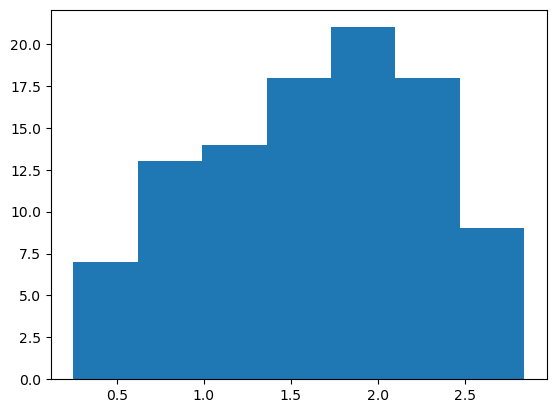

In [22]:
n = 60/(1+ np.log2(100))
plt.hist(angles, bins = int(n))
angle= np.mean(angles)
print("angle = ",angle,"deg")